In [1]:
import pandas as pd
import numpy as np
td_2011 = pd.read_csv('/Users/cd/Documents/Code Academy Berlin/Project 3/2011+trip+data/2011-capitalbikeshare-tripdata.csv')
td_2011_copy = td_2011.copy()  

In [2]:
td_2011.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [3]:
#hunting nans
nan_indices = td_2011.isna()
print(nan_indices.any()) 

Duration                False
Start date              False
End date                False
Start station number    False
Start station           False
End station number      False
End station             False
Bike number             False
Member type             False
dtype: bool


In [4]:
# Count NaN values of whole DataFrame. nothing is NaN
nan_count=td_2011.isna().sum().sum()
print(nan_count)

0


In [5]:
#hunting duplicates, none found
duplicateRows = td_2011[td_2011.duplicated()]
print(duplicateRows) 

Empty DataFrame
Columns: [Duration, Start date, End date, Start station number, Start station, End station number, End station, Bike number, Member type]
Index: []


In [6]:
#The attribute dteday would require type conversion from object (or string type) to timestamp. 
#That is, 'dteday' should be a 'datetime' object.
td_2011['Start date'] = pd.to_datetime(td_2011['Start date'])
td_2011['End date'] = pd.to_datetime(td_2011['End date'])
td_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Duration              1226767 non-null  int64         
 1   Start date            1226767 non-null  datetime64[ns]
 2   End date              1226767 non-null  datetime64[ns]
 3   Start station number  1226767 non-null  int64         
 4   Start station         1226767 non-null  object        
 5   End station number    1226767 non-null  int64         
 6   End station           1226767 non-null  object        
 7   Bike number           1226767 non-null  object        
 8   Member type           1226767 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 84.2+ MB


In [19]:
td_2011['Duration_sec'] = td_2011['Duration']
td_2011.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233


In [15]:
td_2011[["Start station number", "End station number"]] = td_2011[["Start station number", "End station number"]].astype("category")

In [16]:
print(td_2011[["Start station number", "End station number"]].dtypes)

Start station number    category
End station number      category
dtype: object


UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

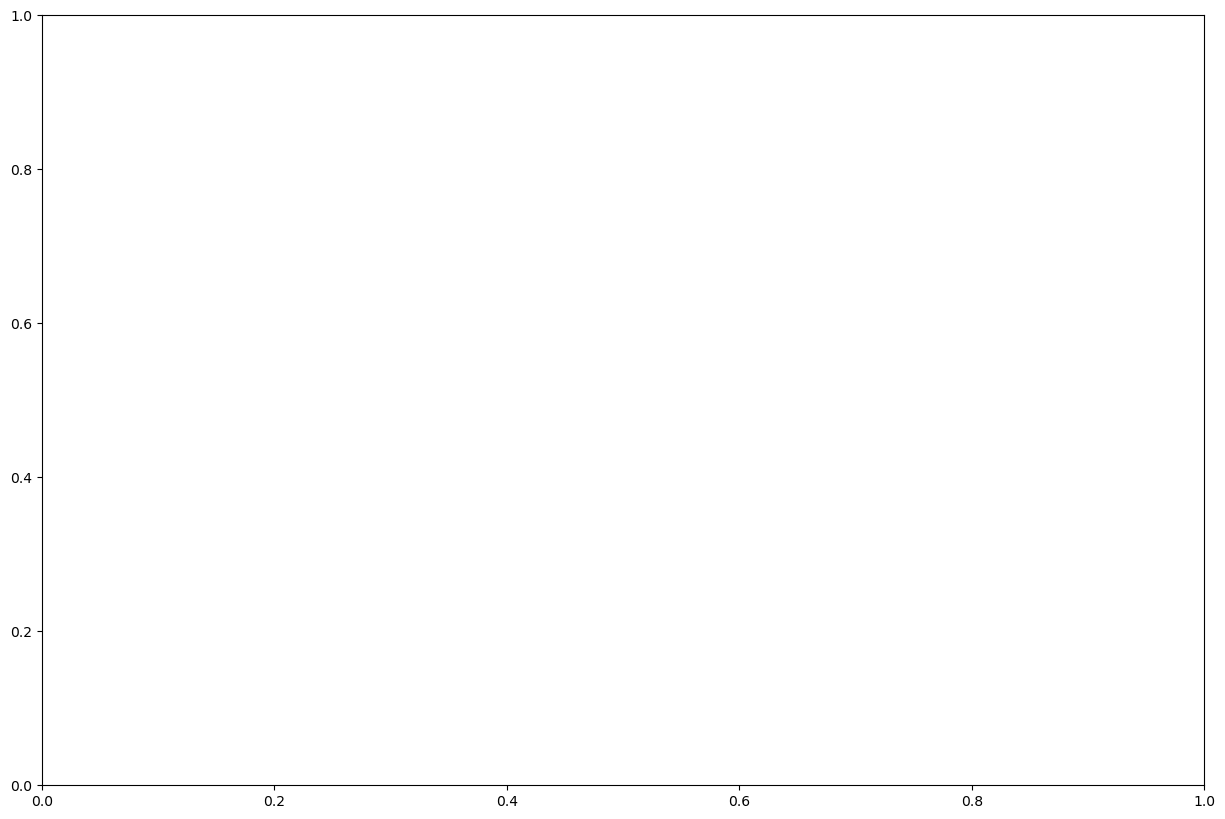

In [18]:
fig,ax = plt.subplots(figsize=(15,10))

sns.pointplot(data=td_2011, x="Start date", y="End station number", hue="Member type", 
    capsize=.2, palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes by season")
plt.show()